# Importing Libraries

In [1]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
from matplotlib.offsetbox import*
import pandas as pd
from colorama import*
from scipy.interpolate import make_interp_spline
import  os
from tabulate import tabulate

font1 = {'family':'serif','color':'black'}

# Calling the File
### File 1 Data of Star Catalogue with headers Name (eg. HIP123456 for Hipparcos Catalogue), Temperature (K) & Absolute Magnitude
### File 2 to 4 List of confirmed exoplanets through different observation facilities (eg. TESS, Kepler, K2 etc.), along with HIP numbers.

In [2]:
file1 = 'Hipparcos Data.xlsx'  
file2 = 'HIP & TESS.xlsx'
file3 = 'HIP & Kepler.xlsx'
file4 = 'HIP & K2.xlsx'
file5 = 'HIP & Other.xlsx'

df1 = pd.read_excel(file1)       
hip_all = df1['Name']  
temp = df1['Temperature (K)']
magnitude = df1['Absolute Magnitude']
vmag = df1['V Magnitude']

df2 = pd.read_excel(file2)       
hip_tess = df2['HIP Name'] 

df3 = pd.read_excel(file3)       
hip_kepler = df3['HIP Name']

df4 = pd.read_excel(file4)       
hip_k2 = df4['HIP Name']

df5 = pd.read_excel(file5)       
hip_other = df5['HIP Name']

# Compare all the data sets to find out the common stars.

In [8]:
tess_temp = []    # Array to store Temperature of host stars which are common in Hipparcos Catalogue and TESS data set.
tess_mag = []     # Array to store Absolute Magnitude of host stars which are common in Hipparcos Catalogue and TESS data set.

kepler_temp = []  # Array to store Temperature of host stars which are common in Hipparcos Catalogue and Kepler data set.
kepler_mag = []   # Array to store Absolute Magnitude of host stars which are common in Hipparcos Catalogue and Kepler data set.

k2_temp = []      # Array to store Temperature of host stars which are common in Hipparcos Catalogue and K2 data set.
k2_mag = []       # Array to store Absolute Magnitude of host stars which are common in Hipparcos Catalogue and K2 data set.

other_temp = []   # Array to store Temperature of host stars which are common in Hipparcos Catalogue and Other Observatories data set.
other_mag = []    # Array to store Absolute Magnitude of host stars which are common in Hipparcos Catalogue and Other Observatories data set.

vmag_conf = []
for i in range(0, np.size(hip_tess)):
    print(np.size(hip_tess) - i,end='\r')
    for j in range(0, np.size(hip_all)):
        if hip_tess[i] == hip_all[j]:
            tess_temp.append(temp[j])
            tess_mag.append(magnitude[j])
            vmag_conf.append(vmag[j])
print("Comparison with TESS data : Done")

for i in range(0, np.size(hip_kepler)):
    print(np.size(hip_kepler) - i,end='\r')
    for j in range(0, np.size(hip_all)):
        if hip_kepler[i] == hip_all[j]:
            kepler_temp.append(temp[j])
            kepler_mag.append(magnitude[j])
            vmag_conf.append(vmag[j])
print("Comparison with Kepler data : Done")
            
for i in range(0, np.size(hip_k2)):
    print(np.size(hip_k2) - i,end='\r')
    for j in range(0, np.size(hip_all)):
        if hip_k2[i] == hip_all[j]:
            k2_temp.append(temp[j])
            k2_mag.append(magnitude[j])
            vmag_conf.append(vmag[j])
print("Comparison with K2 data : Done")

for i in range(0, np.size(hip_other)):
    print(np.size(hip_other) - i,end='\r')
    for j in range(0, np.size(hip_all)):
        if hip_other[i] == hip_all[j]:
            other_temp.append(temp[j])
            other_mag.append(magnitude[j])
            vmag_conf.append(vmag[j])
print("Comparison with Other data : Done")

Comparison with TESS data : Done
Comparison with Kepler data : Done
Comparison with K2 data : Done
Comparison with Other data : Done


# Some arrays to hold the calculated values

In [9]:
xlabel = ["O", "B", "A", "F", "G", "K", "M", "L", "T", "Y"]   # Labels of stellar type

# Array to store the number of exoplanets based on their temperature
c1, c2, c3, c4, c5, c6, c7, c8, c9, c10 = [0,0,0,0,0,0,0,0,0,0] 
temp_range = ["> 30000", "10000 - 30000", "7500 - 10000", "6000 - 7500", "5200 - 6000", "3700 - 5200", "2400 - 3700", \
              "1300 -2400", "700 - 1300", "< 700"]

# Array for V Magnitude
vmag_range = ["< 0", "0 - 3", "3 - 6", "6 - 9", "9 - 12", "12 - 15", "> 15"]
vmag_array = [va1, va2, va3, va4, va5, va6, va7, va8, va9, va10] = [[], [], [], [], [], [], [], [], [], []]

# Calculate the number of stars that fall into the given region

In [10]:
for i in range(np.size(temp)):
    
    # Spectral Type O : Temperature > 30000
    if temp[i] > 30000:
        c1 = c1 + 1
        va1.append(vmag[i])
        
    # Spectral Type B : Temperature 10000 - 30000
    elif temp[i] > 10000 and temp[i] <= 30000:
        c2 = c2 + 1
        va2.append(vmag[i])
        
    # Spectral Type A : Temperature 7500 - 10000
    elif temp[i] > 7500 and temp[i] <= 10000:
        c3 = c3 + 1
        va3.append(vmag[i])
        
    # Spectral Type F : Temperature 6000 - 7500
    elif temp[i] > 6000 and temp[i] <= 7500:
        c4 = c4 + 1
        va4.append(vmag[i])
        
    # Spectral Type G : Temperature 5200 - 6000
    elif temp[i] > 5200 and temp[i] <= 6000:
        c5 = c5 + 1
        va5.append(vmag[i])
        
    # Spectral Type K : Temperature 3700 - 5200
    elif temp[i] > 3700 and temp[i] <= 5200:
        c6 = c6 + 1
        va6.append(vmag[i])
        
    # Spectral Type M : Temperature 2400 - 3700
    elif temp[i] > 2400 and temp[i] <= 3700:
        c7 = c7 + 1
        va7.append(vmag[i])
        
    # Spectral Type L : Temperature 1300 - 2400
    elif temp[i] > 1300 and temp[i] <= 2400:
        c8 = c8 + 1
        va8.append(vmag[i])
        
    # Spectral Type T : Temperature 700 - 1300
    elif temp[i] > 700 and temp[i] <= 1300:
        c9 = c9 + 1
        va9.append(vmag[i])
        
    # Spectral Type Y : Temperature <700
    elif temp[i] <= 700:
        c10 = c10 + 1
        va10.append(vmag[i])

# Separation based on V Magnitude

In [11]:
spe_mag_array = np.zeros([10,7], dtype = int)   

for i in range(0,10):
    for j in range(0, np.size(vmag_array[i])):
        
        if vmag_array[i][j] <= 0:
            spe_mag_array[i][0] = spe_mag_array[i][0] + 1
            
        elif vmag_array[i][j] > 0 and vmag_array[i][j] <= 3:  
            spe_mag_array[i][1] = spe_mag_array[i][1] + 1
            
        elif vmag_array[i][j] > 3 and vmag_array[i][j] <= 6:  
            spe_mag_array[i][2] = spe_mag_array[i][2] + 1
        
        elif vmag_array[i][j] > 6 and vmag_array[i][j] <= 9:  
            spe_mag_array[i][3] = spe_mag_array[i][3] + 1
        
        elif vmag_array[i][j] > 9 and vmag_array[i][j] <= 12:  
            spe_mag_array[i][4] = spe_mag_array[i][4] + 1
            
        elif vmag_array[i][j] > 12 and vmag_array[i][j] <= 15:  
            spe_mag_array[i][5] = spe_mag_array[i][5] + 1
            
        elif vmag_array[i][j] > 15:
            spe_mag_array[i][6] = spe_mag_array[i][6] + 1

# Check for the discripency in number of total data and calculated data

In [12]:
count = np.array([c1, c2, c3, c4, c5, c6, c7, c8, c9, c10])
                 
if sum(count) == np.size(temp):
    print("True")
    print("Sum = ",sum(count), "\nNo. of Rows = ",np.size(temp))
else:
    print("Please check for the blank cells in excel file")
    print("Sum = ",sum(count), "\nNo. of Rows = ",np.size(temp), "\nDifference = ", abs(np.size(temp) - sum(count)))
    
ocrate = count*100/np.size(temp)

True
Sum =  111222 
No. of Rows =  111222


In [14]:
base = [count, count, count, count, count, count, count]
base1 = [ocrate, ocrate, ocrate, ocrate, ocrate, ocrate, ocrate]
vmag_ocrate = spe_mag_array*np.transpose(base1)/np.transpose(base)

vmag_ocrate[np.isnan(vmag_ocrate)] = 0

<ipython-input-14-0467d64b2078>:3: RuntimeWarning: invalid value encountered in true_divide
  vmag_ocrate = spe_mag_array*np.transpose(base1)/np.transpose(base)


# Graph 1 : HR Diagram along with stars having confirmed exoplanets marked with different colors

Stars mark with different colors are the stars hosting confirmed exoplanets


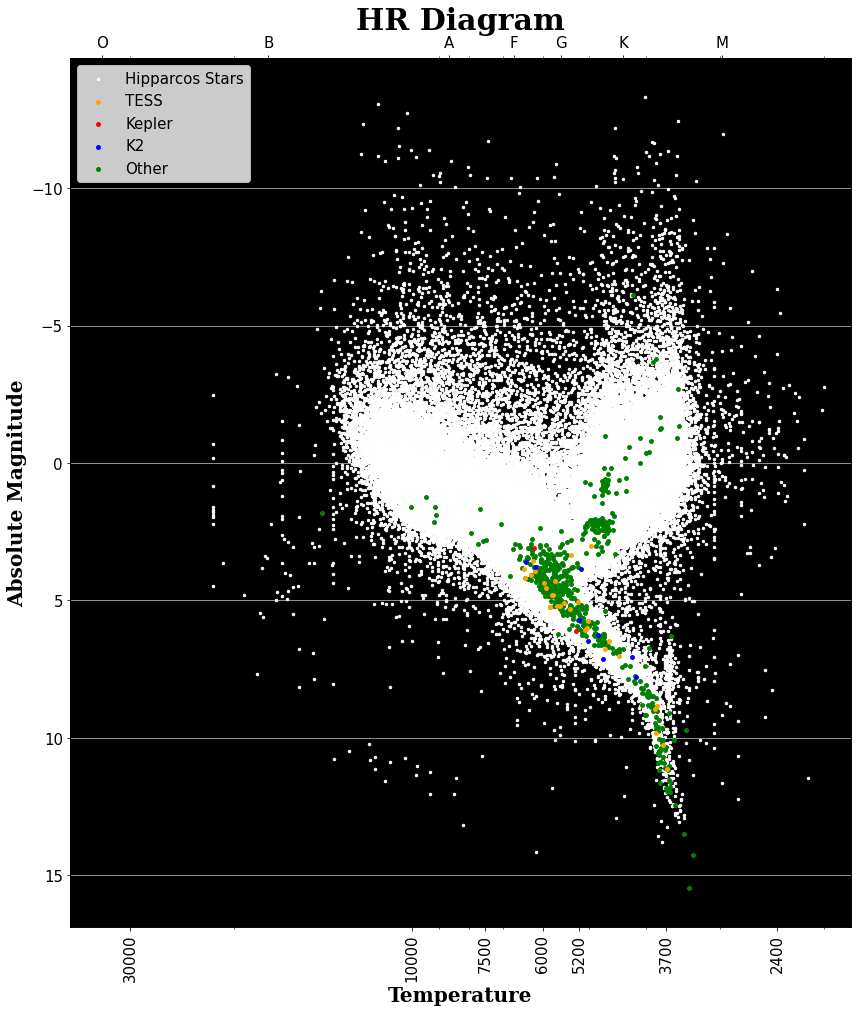

In [16]:
# ---------------------------------------------------------------------------------------------------------------------------
# If only HR diagram is needed with the stars with different colors based on the spectral types put c = col 
#                                              Here
#                                               v
# plt.scatter(temp, magnitude, zorder = 2, c = 'w', s = 6, label = "Hipparcos Stars")
# ---------------------------------------------------------------------------------------------------------------------------
col = np.where((temp > 30000), 'blue', \
               np.where((temp > 10000) & (temp <= 30000), 'dodgerblue', \
                        np.where((temp > 7500) & (temp <= 10000), 'white', \
                                 np.where((temp > 6000) & (temp <= 7500), 'khaki', \
                                          np.where((temp > 5200) & (temp <= 6000), 'yellow', \
                                                   np.where((temp > 3700) & (temp <= 5200), 'darkorange', \
                                                            np.where((temp > 2400) & (temp <= 3700), 'red', 'darkred')))))))

print("Stars mark with different colors are the stars hosting confirmed exoplanets")

# Plot the figure
fig, ax = plt.subplots()

plt.scatter(temp, magnitude, zorder = 2, c = 'w', s = 6, label = "Hipparcos Stars")   # HR Diagram
plt.scatter(tess_temp, tess_mag, zorder = 4, c = 'orange', s = 15, label = "TESS")    # TESS confirmed Exoplanets
plt.scatter(kepler_temp, kepler_mag, zorder = 6, c = 'r', s = 15, label = "Kepler")   # Kepler confirmed Exoplanets
plt.scatter(k2_temp, k2_mag, zorder = 5, c = 'b', s = 15, label = "K2")               # K2 confirmed Exoplanets
plt.scatter(other_temp, other_mag, zorder = 3, c = 'g', s = 15, label = "Other")      # Other facilities confirmed Exoplanets
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.gca().set_facecolor('k')

plt.title("HR Diagram", fontdict=font1, weight = "bold",fontsize="30")
plt.xlabel('Temperature',fontdict=font1, weight = "bold",fontsize="20")
plt.ylabel('Absolute Magnitude',fontdict=font1, weight = "bold",fontsize="20")

plt.legend(loc ="upper left", fontsize=15)

plt.xticks(fontsize = 15, rotation = 90)
plt.yticks(fontsize = 15)
plt.grid(axis = "y", zorder = 1) 

plt.xlim(38000,1800)

tick_locs = [2400, 3700, 5200, 6000, 7500, 10000, 30000]

ax.set_xscale('log', base = 10)
plt.xticks(tick_locs, tick_locs)

ax2 = ax.twiny()
plt.xlim(38000,1800)
ax2.set_xscale('log', base = 10)
tick_locs2 = [2979, 4386, 5586, 6708, 8660, 17500, 33500]
tick_lbls2 = ["M", "K", "G", "F", "A", "B", "O"]
plt.xticks(tick_locs2, tick_lbls2, fontsize = 15)

fig=plt.gcf()
fig.set_size_inches(14,16)

fig.savefig(os.path.join('HR Diagram - Hipparcos Catalogue.jpeg'), format='jpeg', dpi=600, bbox_inches = 'tight')

# Statistical analysis on the Data

In [17]:
counter_array = np.zeros([4,10], dtype = int) # Array to store the calculated numbers
facility_array = [tess_temp, kepler_temp, k2_temp, other_temp]

for p in range(0, np.size(facility_array)):
    for n in range(0, np.size(facility_array[p])):
    
        # Spectral Type O : Temperature > 30000
        if facility_array[p][n] > 30000:
            counter_array[p][0] = counter_array[p][0] + 1
        
        # Spectral Type B : Temperature 10000 - 30000
        elif facility_array[p][n] > 10000 and facility_array[p][n] <= 30000:
            counter_array[p][1] = counter_array[p][1] + 1
        
        # Spectral Type A : Temperature 7500 - 10000
        elif facility_array[p][n] > 7500 and facility_array[p][n] <= 10000:
            counter_array[p][2] = counter_array[p][2] + 1
        
        # Spectral Type F : Temperature 6000 - 7500
        elif facility_array[p][n] > 6000 and facility_array[p][n] <= 7500:
            counter_array[p][3] = counter_array[p][3] + 1
        
        # Spectral Type G : Temperature 5200 - 6000
        elif facility_array[p][n] > 5200 and facility_array[p][n] <= 6000:
            counter_array[p][4] = counter_array[p][4] + 1
        
        # Spectral Type K : Temperature 3700 - 5200
        elif facility_array[p][n] > 3700 and facility_array[p][n] <= 5200:
            counter_array[p][5] = counter_array[p][5] + 1
        
        # Spectral Type M : Temperature 2400 - 3700
        elif facility_array[p][n] > 2400 and facility_array[p][n] <= 3700:
            counter_array[p][6] = counter_array[p][6] + 1
        
        # Spectral Type L : Temperature 1300 - 2400
        elif facility_array[p][n] > 1300 and facility_array[p][n] <= 2400:
            counter_array[p][7] = counter_array[p][7] + 1
        
        # Spectral Type T : Temperature 700 - 1300
        elif facility_array[p][n] > 700 and facility_array[p][n] <= 1300:
            counter_array[p][8] = counter_array[p][8] + 1
        
        # Spectral Type Y : Temperature <700
        elif facility_array[p][n] <= 700:
            counter_array[p][9] = counter_array[p][9] + 1

data = sum(counter_array)

C:\Users\computer\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


# Spectral Distribution Bar Graph

In [18]:
p1 = np.transpose(vmag_ocrate)[0]
p2 = np.transpose(vmag_ocrate)[1]
p3 = np.transpose(vmag_ocrate)[2]
p4 = np.transpose(vmag_ocrate)[3]
p5 = np.transpose(vmag_ocrate)[4]
p6 = np.transpose(vmag_ocrate)[5]
p7 = np.transpose(vmag_ocrate)[6]

<ipython-input-19-4250afa6c097>:11: RuntimeWarning: invalid value encountered in true_divide
  plt.bar(xvalue1, data*100/count, zorder = 5, color="k", edgecolor='darkgoldenrod', linewidth = 0.5, width = 0.35, \


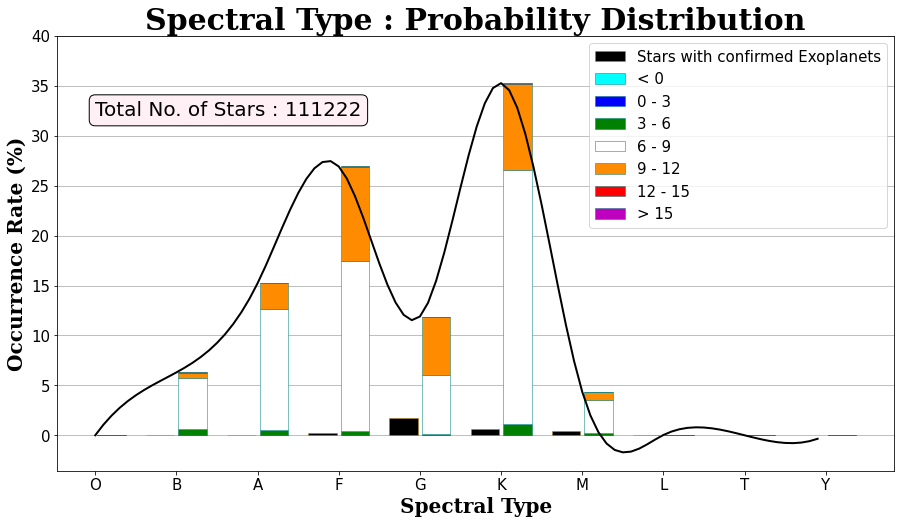

In [19]:
x = np.linspace(0, np.size(xlabel)-1, np.size(xlabel))
X_Y_Spline = make_interp_spline(x, ocrate)

X_ = np.arange(x.min(), x.max(), 0.1)
Y_ = X_Y_Spline(X_)

xvalue1 = [-0.2, 0.8, 1.8, 2.8, 3.8, 4.8, 5.8, 6.8, 7.8, 8.8]
xvalue2 = [0.2, 1.2, 2.2, 3.2, 4.2, 5.2, 6.2, 7.2, 8.2, 9.2]


plt.bar(xvalue1, data*100/count, zorder = 5, color="k", edgecolor='darkgoldenrod', linewidth = 0.5, width = 0.35, \
        label = "Stars with confirmed Exoplanets")

plt.bar(xvalue2, p1, zorder = 3, color="cyan", edgecolor='teal', linewidth = 0.5, width = 0.35, \
        label = "< 0")
plt.bar(xvalue2, p2, bottom = p1, zorder = 3, color="blue", edgecolor='teal', linewidth = 0.5, width = 0.35, \
        label = "0 - 3")
plt.bar(xvalue2, p3, zorder = 3, color="green", edgecolor='teal', linewidth = 0.5, width = 0.35, \
        label = "3 - 6")
plt.bar(xvalue2, p4, bottom =  p3, zorder = 3, color="white", edgecolor='teal', linewidth = 0.5, width = 0.35, \
        label = "6 - 9")
plt.bar(xvalue2, p5, bottom =  p3+p4, zorder = 3, color="darkorange", edgecolor='teal', linewidth = 0.5, width = 0.35, \
        label = "9 - 12")
plt.bar(xvalue2, p6, bottom =  p3+p4+p5, zorder = 3, color="red", edgecolor='teal', linewidth = 0.5, width = 0.35, \
        label = "12 - 15")
plt.bar(xvalue2, p7, bottom =  p1+p2+p3+p4+p5+p6, zorder = 3, color="m", edgecolor='teal', linewidth = 0.5, width = 0.35, \
        label = "> 15")

plt.plot(X_, Y_, 'k', zorder = 4, linewidth = 2)

plt.title("Spectral Type : Probability Distribution", fontdict=font1, weight = "bold",fontsize="30")
plt.xlabel('Spectral Type',fontdict=font1, weight = "bold",fontsize="20")
plt.ylabel('Occurrence Rate (%)',fontdict=font1, weight = "bold",fontsize="20")

tick_locs = [0,1,2,3,4,5,6,7,8,9]

ax.set_xscale('linear')
plt.xticks(tick_locs, xlabel)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.grid(axis = "y", zorder = 1)
plt.legend(loc ="upper right", fontsize=15)
plt.ylim(top = 40)

props = dict(boxstyle='round', facecolor='lavenderblush')

plt.text(0, 33.5, "Total No. of Stars : %d"%(np.size(temp)), fontsize=20, verticalalignment='top', bbox=props)

fig=plt.gcf()
fig.set_size_inches(15,8)

fig.savefig(os.path.join('Spectral Type - Hipparcos Catalogue.jpeg'), format='jpeg', dpi=600, bbox_inches = 'tight')

# Saving the Output File

In [20]:
mydata = [np.transpose(xlabel), np.transpose(temp_range),np.round(ocrate,2), count, np.transpose(sum(counter_array))]
mydata2 = [np.transpose(xlabel), count, np.transpose(spe_mag_array)[0], np.transpose(spe_mag_array)[1], \
           np.transpose(spe_mag_array)[2], np.transpose(spe_mag_array)[3], np.transpose(spe_mag_array)[4], \
          np.transpose(spe_mag_array)[5], np.transpose(spe_mag_array)[6]]

with open("Spectral Type - Hipparcos.txt", "w") as f:
    print("Total number of stars : %d"%(np.size(temp)), file = f)
    print(" ",file = f)
    print(tabulate(np.transpose(mydata), headers = ["Spectral Type", "Temperature (K)", "Occurrence Rate (%)", \
                                                "# of Stars", "# of stars hosting Exoplanets"], \
                                                tablefmt="simple", numalign = "center", stralign = "center"), file = f)
    print(" ", file = f)
    print(" ", file = f)
    print(tabulate(np.transpose(mydata2), headers = ["Spectral Type", "# of Stars", "< 0", "0 - 3", "3 - 6", \
                                                    "6 - 9", "9 - 12", "12 -15", "> 15"], \
                                                tablefmt="simple", numalign = "center", stralign = "center"), file = f)
    print(" ", file = f)
    print(" ", file = f)
    print("* Data was taken on 30th Janulary, 2022 from Hipparcos Catalog", file = f)

with open("Spectral Type - Hipparcos.txt", "r") as datafile:
    print(datafile.read())

Total number of stars : 111222
 
 Spectral Type    Temperature (K)    Occurrence Rate (%)    # of Stars    # of stars hosting Exoplanets
---------------  -----------------  ---------------------  ------------  -------------------------------
       O              > 30000                 0                 0                       0
       B           10000 - 30000             6.3               7005                     2
       A           7500 - 10000             15.23             16934                     8
       F            6000 - 7500             26.92             29946                    77
       G            5200 - 6000             11.89             13229                    232
       K            3700 - 5200             35.27             39229                    254
       M            2400 - 3700             4.36               4848                    20
       L            1300 -2400              0.03                31                      0
       T            700 - 1300      